In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from collections import defaultdict
from shutil import copy
from shutil import copytree, rmtree

import tensorflow as tf
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
%cd /kaggle/input/food-101/food-101/
os.listdir('./food-101/images')

/kaggle/input/food-101/food-101


['macarons',
 'french_toast',
 'lobster_bisque',
 'prime_rib',
 'pork_chop',
 'guacamole',
 'baby_back_ribs',
 'mussels',
 'beef_carpaccio',
 'poutine',
 'hot_and_sour_soup',
 'seaweed_salad',
 'foie_gras',
 'dumplings',
 'peking_duck',
 'takoyaki',
 'bibimbap',
 'falafel',
 'pulled_pork_sandwich',
 'lobster_roll_sandwich',
 'carrot_cake',
 'beet_salad',
 'panna_cotta',
 'donuts',
 'red_velvet_cake',
 'grilled_cheese_sandwich',
 'cannoli',
 'spring_rolls',
 'shrimp_and_grits',
 'clam_chowder',
 'omelette',
 'fried_calamari',
 'caprese_salad',
 'oysters',
 'scallops',
 'ramen',
 'grilled_salmon',
 'croque_madame',
 'filet_mignon',
 'hamburger',
 'spaghetti_carbonara',
 'miso_soup',
 'bread_pudding',
 'lasagna',
 'crab_cakes',
 'cheesecake',
 'spaghetti_bolognese',
 'cup_cakes',
 'creme_brulee',
 'waffles',
 'fish_and_chips',
 'paella',
 'macaroni_and_cheese',
 'chocolate_mousse',
 'ravioli',
 'chicken_curry',
 'caesar_salad',
 'nachos',
 'tiramisu',
 'frozen_yogurt',
 'ice_cream',
 'ris

In [5]:
os.listdir('./food-101/meta')

['test.txt',
 'train.json',
 'labels.txt',
 'test.json',
 'train.txt',
 'classes.txt']

In [6]:
train_df = pd.read_csv('food-101/meta/train.txt', header = None, names=['path'])
train_df.head()
test_df = pd.read_csv('food-101/meta/test.txt', header = None, names=['path'])
test_df.head()

,path
0,apple_pie/1011328
1,apple_pie/101251
2,apple_pie/1034399
3,apple_pie/103801
4,apple_pie/1038694


In [7]:
def spliter(data, class_or_id='id'):
    if class_or_id.upper() == 'CLASS':
        output = data.split('/')[0]
        
    else:
        output = data.split('/')[-1]
    return output
train_df['label'] = train_df['path'].map(lambda x: spliter(data = x, class_or_id = 'Class')) 
train_df.head()

,path,label
0,apple_pie/1005649,apple_pie
1,apple_pie/1014775,apple_pie
2,apple_pie/1026328,apple_pie
3,apple_pie/1028787,apple_pie
4,apple_pie/1043283,apple_pie


In [8]:
mini_20 = train_df['label'].unique()[:20]
mini_20 = [f.upper() for f in mini_20]
mini_20

['APPLE_PIE',
 'BABY_BACK_RIBS',
 'BAKLAVA',
 'BEEF_CARPACCIO',
 'BEEF_TARTARE',
 'BEET_SALAD',
 'BEIGNETS',
 'BIBIMBAP',
 'BREAD_PUDDING',
 'BREAKFAST_BURRITO',
 'BRUSCHETTA',
 'CAESAR_SALAD',
 'CANNOLI',
 'CAPRESE_SALAD',
 'CARROT_CAKE',
 'CEVICHE',
 'CHEESECAKE',
 'CHEESE_PLATE',
 'CHICKEN_CURRY',
 'CHICKEN_QUESADILLA']

In [9]:
train_df['label'] = train_df['path'].map(lambda x: spliter(data = x, class_or_id = 'Class')) 
train_df.head()

,path,label
0,apple_pie/1005649,apple_pie
1,apple_pie/1014775,apple_pie
2,apple_pie/1026328,apple_pie
3,apple_pie/1028787,apple_pie
4,apple_pie/1043283,apple_pie


In [10]:
train_df['idx'] = train_df['path'].map(lambda x: spliter(x)) 
train_df.head()

,path,label,idx
0,apple_pie/1005649,apple_pie,1005649
1,apple_pie/1014775,apple_pie,1014775
2,apple_pie/1026328,apple_pie,1026328
3,apple_pie/1028787,apple_pie,1028787
4,apple_pie/1043283,apple_pie,1043283


In [11]:
test_df['label'] = test_df['path'].map(lambda x: spliter(x, 'class')) 
test_df['idx'] = test_df['path'].map(lambda x: spliter(x)) 
test_df.head()

,path,label,idx
0,apple_pie/1011328,apple_pie,1011328
1,apple_pie/101251,apple_pie,101251
2,apple_pie/1034399,apple_pie,1034399
3,apple_pie/103801,apple_pie,103801
4,apple_pie/1038694,apple_pie,1038694


In [12]:
def spliter(data, class_or_id='id'):
    if class_or_id.upper() == 'CLASS':
        output = data.split('/')[0]
        
    else:
        output = data.split('/')[-1]
    return output

In [13]:
def prepare_data(label):
    if label.upper() in mini_20:
        return label
    else:
        return 'Others'
train_df['label'] = train_df['label'].map(lambda x: prepare_data(x))
test_df['label'] = test_df['label'].map(lambda x: prepare_data(x))
train_df['label'].unique()

array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake',
       'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'Others'],
      dtype=object)

In [14]:
def add_exact_path(path):
    return 'food-101/images/'+path+'.jpg'
train_df['path'] = train_df[['path']].apply(add_exact_path, axis=1)
test_df['path'] = test_df[['path']].apply(add_exact_path, axis=1)
train_df.head()

,path,label,idx
0,food-101/images/apple_pie/1005649.jpg,apple_pie,1005649
1,food-101/images/apple_pie/1014775.jpg,apple_pie,1014775
2,food-101/images/apple_pie/1026328.jpg,apple_pie,1026328
3,food-101/images/apple_pie/1028787.jpg,apple_pie,1028787
4,food-101/images/apple_pie/1043283.jpg,apple_pie,1043283


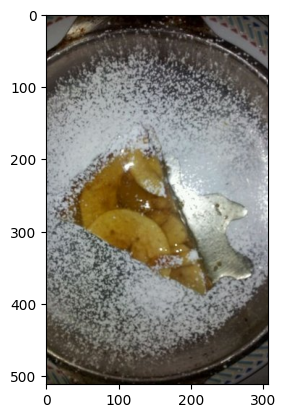

In [15]:
from matplotlib import pyplot as plt
img = plt.imread(train_df['path'].iloc[0])
plt.imshow(img)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
test_gen = ImageDataGenerator(rescale=1./255)
train_gen = datagen.flow_from_dataframe(dataframe = train_df, directory=None, x_col='path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb',
    classes=None, class_mode='categorical', batch_size=32, shuffle=True)

Found 75750 validated image filenames belonging to 21 classes.


In [17]:
test_gen = test_gen.flow_from_dataframe(dataframe = test_df, directory=None, x_col='path', y_col='label',
    weight_col=None, target_size=(256, 256), color_mode='rgb',
    classes=None, class_mode='categorical', batch_size=32, shuffle=True)

Found 25250 validated image filenames belonging to 21 classes.


In [18]:
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.xception import Xception

Xception = Xception(weights='imagenet', include_top=False)
x = Xception.output
x = GlobalAveragePooling2D()(x)
x = Dense(256,activation='relu')(x)
# x = Dropout(0.4)(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(21, activation='softmax')(x)

model = Model(inputs=Xception.input, outputs=predictions)
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

83683744/83683744 [==============================] - 0s 0us/step


In [21]:
history = model.fit(train_gen,steps_per_epoch = len(train_gen) // 32,epochs=5,verbose=1)

Epoch 1/5
74/74 [==============================] - 87s 716ms/step - loss: 1.3571 - accuracy: 0.7838
Epoch 2/5
74/74 [==============================] - 54s 716ms/step - loss: 1.1380 - accuracy: 0.8053
Epoch 3/5
74/74 [==============================] - 53s 703ms/step - loss: 1.0612 - accuracy: 0.8049
Epoch 4/5
74/74 [==============================] - 53s 714ms/step - loss: 1.0623 - accuracy: 0.8003
Epoch 5/5
74/74 [==============================] - 53s 707ms/step - loss: 0.9561 - accuracy: 0.8167


In [22]:
result = model.evaluate(test_gen, batch_size=32)
print(result)

790/790 [==============================] - 256s 323ms/step - loss: 1.2357 - accuracy: 0.8020
[1.235700249671936, 0.801980197429657]


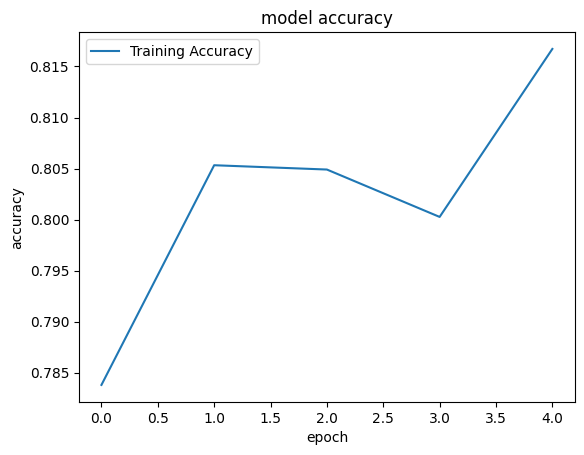

In [23]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy'], loc='upper left')
plt.show()